<a href="https://colab.research.google.com/github/ArlexMR/ECE-614-DeepLearning/blob/main/ArlexMarin_JohnMoore_ECE614_Lab5Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECE 614 - DEEP LEARNING
## SPRING 2023
## LABORATORY 5
## JOHN MOORE and ARLEX MARIN

#Imports

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
# from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import matplotlib.pyplot as plt

from keras.layers import Input
from keras import optimizers
import pickle

import pandas as pd


#Functions

In [ ]:
def char_to_int(character):
  val = ord(character.lower()) - 97
  if val < 0:  #handle for spaces which otherwise would go to -65
    val = 26    #spaces hard set to 26 (z=25)
  return val

# One hot encoding
# Ex. letter 'a' is represented as 0 on 0-25 scale which transforms into
# [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
def one_hot_encode(arr):
  return np.eye(size_of_dict)[arr]

# Add a space after a word, otherwise character prediction would never end
def pad_spaces(word):
  return word + " ";

# Used to obtain index of the max value of the model prediction and return a letter
def index_to_letter(arr):
  index = np.argmax(arr)
  if index == 26:
    return " "
  else:
    return chr(index + 97) #ascii value, 97 is value of 'a'

# Check if predicted word exists in the original csv file
def is_predicted_word_match(word):
  if word in csv_file:
    return True
  else:
    return False

# Plot Loss Graph
def plot_loss_graph(history):
  plt.figure()
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss'); plt.xlabel('Epoch')
  plt.legend(('Train','Validation'))
  plt.show()

# Plot Accuracy Graph
def plot_acc_graph(history):
  plt.figure()
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy'); plt.xlabel('Epoch')
  plt.legend(('Train','Validation'))
  plt.show()

def get_1LSTMlayer_model(sequence_length, input_size, dropout_rate):
  model = Sequential()

  model.add(LSTM(input_size, input_shape=(sequence_length, 1)))
  model.add(Dropout(dropout_rate))
  model.add(Dense(size_of_dict, activation='softmax'))
  model.add(Dense(size_of_dict, activation='softmax'))
  
  model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
  model.summary()
  return model

def get_2LSTMlayers_model(sequence_length, input_size, dropout_rate):
  model = Sequential()
  
  model.add(LSTM(input_size, input_shape=(sequence_length, 1), return_sequences=True))
  model.add(Dropout(dropout_rate))
  model.add(LSTM(input_size))
  model.add(Dropout(dropout_rate))
  model.add(Dense(size_of_dict, activation='softmax'))

  model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
  model.summary()
  return model

# Task 1:
Develop your own "bag of words" with 200 words for training. Must be at least four letters long nouns, adjectives, or verbs.

###Load CSV File

In [ ]:
csv_file = np.genfromtxt('ArlexMarin_JohnMoore_ECE614_Lab5_WordCorpus.csv', delimiter=',', dtype=str)
print(csv_file)
size_of_dict = 26

['\ufeffabigail' 'acoustics' 'addison' 'albert' 'alexander' 'algebra'
 'algorithm' 'amanda' 'amarillo' 'amplitude' 'anchorage' 'angel' 'angle'
 'anode' 'anthony' 'arlington' 'arthur' 'athens' 'atlanta' 'austin'
 'australia' 'baltimore' 'baseball' 'basketball' 'belgium' 'benjamin'
 'berkeley' 'boise' 'boyle' 'brandon' 'brayden' 'brianna' 'brown' 'bryson'
 'cameron' 'canada' 'cathode' 'centimeter' 'charles' 'charlotte' 'chicago'
 'chole' 'christopher' 'circle' 'circumference' 'columbus' 'connor'
 'curve' 'cylinder' 'dallas' 'daniel' 'dearborn' 'decimal' 'denmark'
 'detroit' 'digit' 'distribution' 'divide' 'doppler' 'egypt' 'elasticity'
 'electromagnet' 'elizabeth' 'emilia' 'emily' 'entropy' 'equals'
 'equation' 'equivalent' 'ethan' 'evaluate' 'factorial' 'factorial'
 'fencing' 'fibonacci' 'figure' 'football' 'fraction' 'france' 'gabriel'
 'gavin' 'geometry' 'george' 'georgia' 'giovanni' 'graph' 'greece' 'green'
 'hannah' 'henry' 'histogram' 'hockey' 'honolulu' 'houston' 'hungary'
 'hunts

#Task 2:
Try several architectures of a RNN. Aim for 10 different models and keep track of the loss/accuracy in a neatly organized table. Include graphs of loss/accuracy in your report as well as a summary table of all models. You the same length/epochs/batch size values as in the Lab 5 Intro.                           
sequence length = 3, epochs = 300, batchsize = 10


###Data Processing

In [ ]:
seq_length = 3
x_train = []
y_train = []

for word in csv_file:
  #word = pad_spaces(word) #add spaces on the end of the word
  for i in range(0, len(word) - seq_length, 1):
    seq_in = word[i:i + seq_length]
    seq_out = word[i + seq_length]
    x_train.append([char_to_int(char) for char in seq_in])
    y_train.append(char_to_int(seq_out))

print(x_train[0:5])
print(y_train[0:5])
# reshape X so the model can input it properly
x_train = np.reshape(x_train, (len(x_train), seq_length, 1))
# normalize
x_train = x_train / float(size_of_dict)
# one hot encode the output variable
y_train = np_utils.to_categorical(y_train)

[[65182, 0, 1], [0, 1, 8], [1, 8, 6], [8, 6, 0], [6, 0, 8]]
[8, 6, 0, 8, 11]


###MODEL ARCHITECTURES

#####Models:
1. input_layer = 128, dropout_rate = 0.1, 1 LSTM layer
2. input_layer = 128, dropout_rate = 0.2, 1 LSTM layer
3. input_layer = 128, dropout_rate = 0.3, 1 LSTM layer
4. input_layer = 256, dropout_rate = 0.1, 1 LSTM layer
5. input_layer = 256, dropout_rate = 0.2, 1 LSTM layer
6. input_layer = 256, dropout_rate = 0.3, 1 LSTM layer
7. input_layer = 128, dropout_rate = 0.1, 2 LSTM layers
8. input_layer = 128, dropout_rate = 0.2, 2 LSTM layers
9. input_layer = 128, dropout_rate = 0.3, 2 LSTM layers
10. input_layer = 256, dropout_rate = 0.1, 2 LSTM layers
11. input_layer = 256, dropout_rate = 0.2, 2 LSTM layers
12. input_layer = 256, dropout_rate = 0.3, 2 LSTM layers

## Train Models
### Skip the training subsection by uploading the models in pickle format.  [Click here to be directed to `Load Trained models` ](#scrollTo=eEaicYPf0VXf)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 26)                3354      
                                                                 
 dense_5 (Dense)             (None, 26)                702       
                                                                 
Total params: 70,616
Trainable params: 70,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 67s 61ms/step - loss: 3.2055 - accuracy: 0.1014 - val_loss: 3.1399 - val_accuracy: 0.1150
Epoch 2/300
88/88 [====================

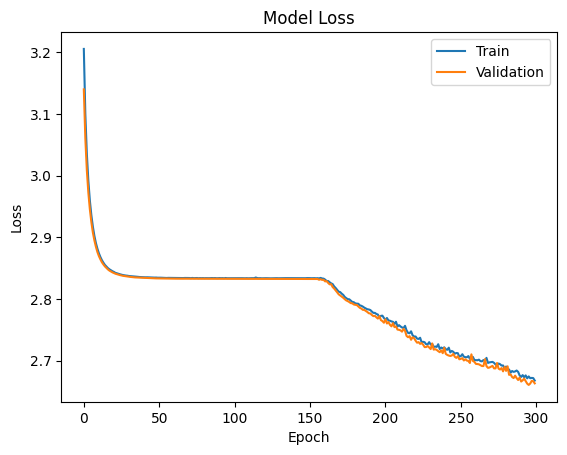

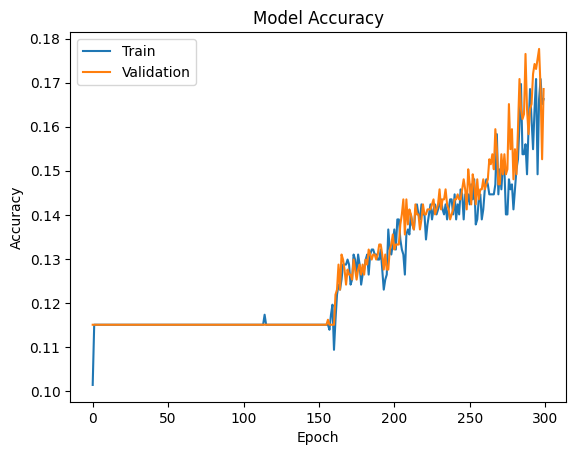

In [ ]:
#@title Model 1
seq_length = 3
input_size = 128
dropout_rate = 0.1
batch_size = 10
epochs = 300

model1 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history1 = model1.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history1)
plot_acc_graph(history1)

filename = "history1.pickle"
var_to_save = history1      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 26)                3354      
                                                                 
 dense_7 (Dense)             (None, 26)                702       
                                                                 
Total params: 70,616
Trainable params: 70,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 4s 15ms/step - loss: 3.2053 - accuracy: 0.0729 - val_loss: 3.1136 - val_accuracy: 0.0866
Epoch 2/300
88/88 [=====================

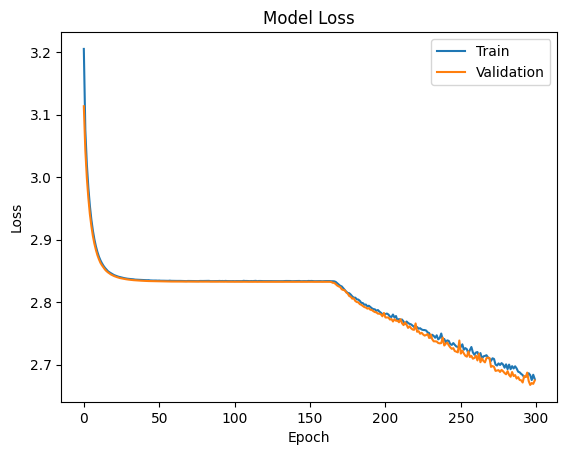

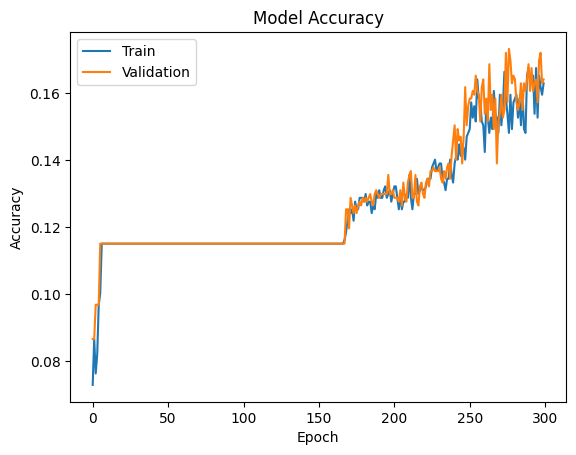

In [ ]:
#@title Model 2
seq_length = 3
input_size = 128
dropout_rate = 0.2
batch_size = 10
epochs = 300

model2 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history2 = model2.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history2)
plot_acc_graph(history2)

filename = "history2.pickle"
var_to_save = history2      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 26)                3354      
                                                                 
 dense_9 (Dense)             (None, 26)                702       
                                                                 
Total params: 70,616
Trainable params: 70,616
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 4s 15ms/step - loss: 3.2130 - accuracy: 0.0638 - val_loss: 3.1571 - val_accuracy: 0.0957
Epoch 2/300
88/88 [=====================

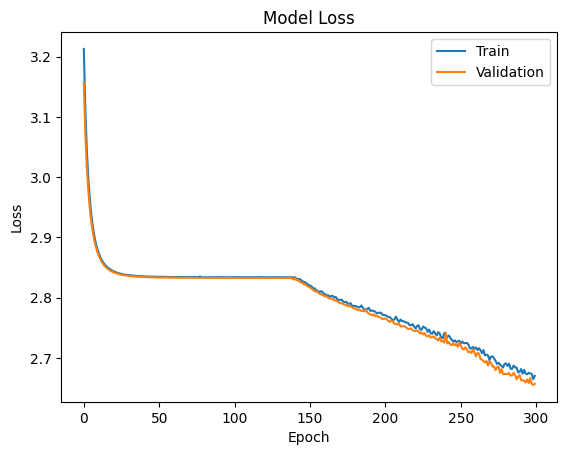

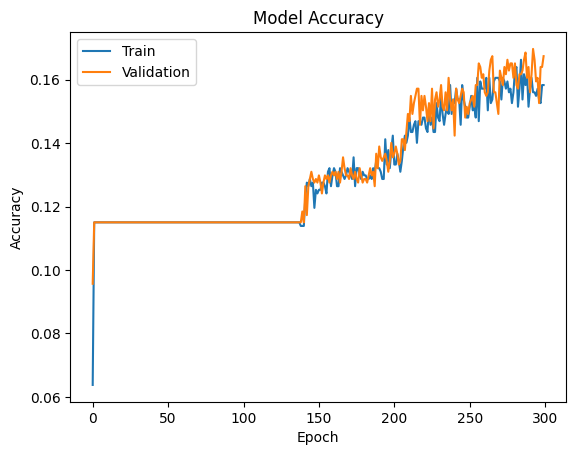

In [ ]:
#@title Model 3
seq_length = 3
input_size = 128
dropout_rate = 0.3
batch_size = 10
epochs = 300

model3 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history3 = model3.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history3)
plot_acc_graph(history3)

filename = "history3.pickle"
var_to_save = history3      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 26)                6682      
                                                                 
 dense_11 (Dense)            (None, 26)                702       
                                                                 
Total params: 271,576
Trainable params: 271,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 5s 22ms/step - loss: 3.1923 - accuracy: 0.0911 - val_loss: 3.1190 - val_accuracy: 0.1173
Epoch 2/300
88/88 [===================

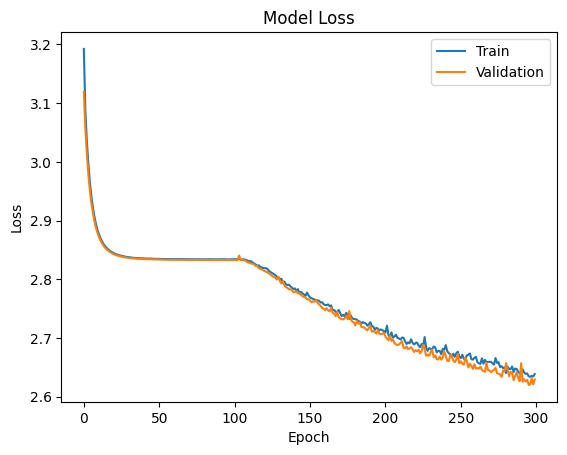

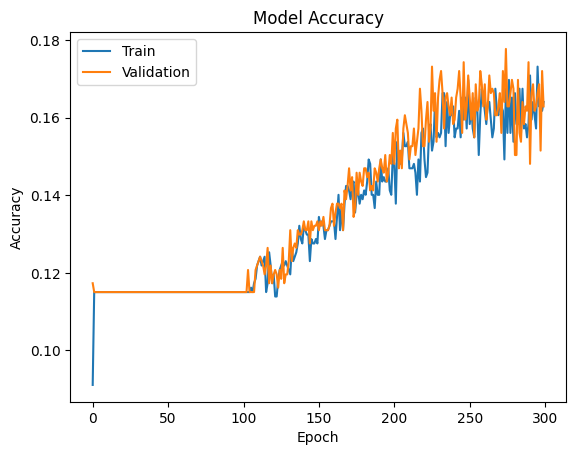

In [ ]:
#@title Model 4
seq_length = 3
input_size = 256
dropout_rate = 0.1
batch_size = 10
epochs = 300

model4 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history4 = model4.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history4)
plot_acc_graph(history4)

filename = "history4.pickle"
var_to_save = history4      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 26)                6682      
                                                                 
 dense_13 (Dense)            (None, 26)                702       
                                                                 
Total params: 271,576
Trainable params: 271,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 6s 27ms/step - loss: 3.1991 - accuracy: 0.1025 - val_loss: 3.1246 - val_accuracy: 0.1150
Epoch 2/300
88/88 [===================

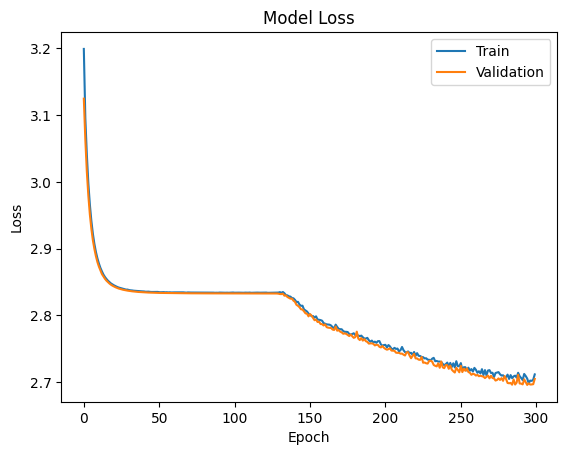

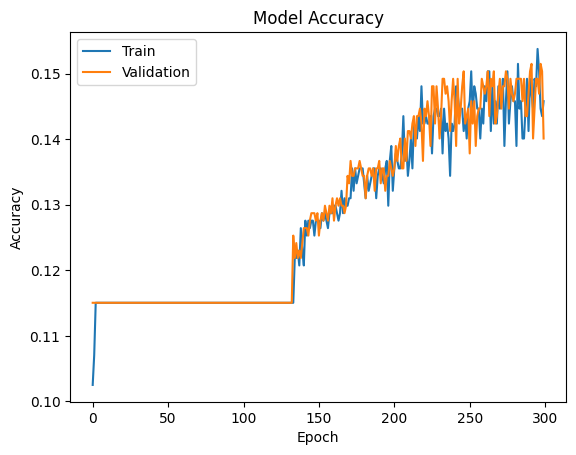

In [ ]:
#@title Model 5
seq_length = 3
input_size = 256
dropout_rate = 0.2
batch_size = 10
epochs = 300

model5 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history5 = model5.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history5)
plot_acc_graph(history5)

filename = "history5.pickle"
var_to_save = history5      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_14 (Dense)            (None, 26)                6682      
                                                                 
 dense_15 (Dense)            (None, 26)                702       
                                                                 
Total params: 271,576
Trainable params: 271,576
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [==============================] - 5s 25ms/step - loss: 3.2080 - accuracy: 0.0797 - val_loss: 3.1379 - val_accuracy: 0.1150
Epoch 2/300
88/88 [===================

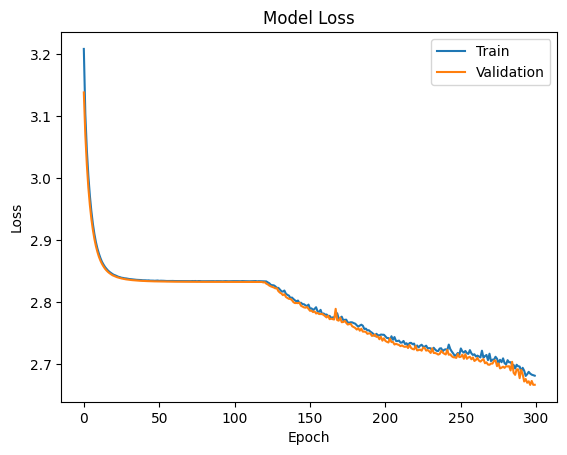

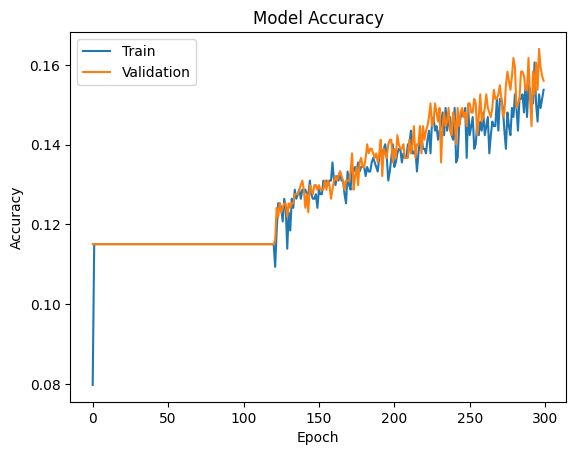

In [ ]:
#@title Model 6
seq_length = 3
input_size = 256
dropout_rate = 0.3
batch_size = 10
epochs = 300

model6 = get_1LSTMlayer_model(seq_length, input_size, dropout_rate)
history6 = model6.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history6)
plot_acc_graph(history6)

filename = "history6.pickle"
var_to_save = history6      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 3, 128)            66560     
                                                                 
 dropout_8 (Dropout)         (None, 3, 128)            0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [=============================

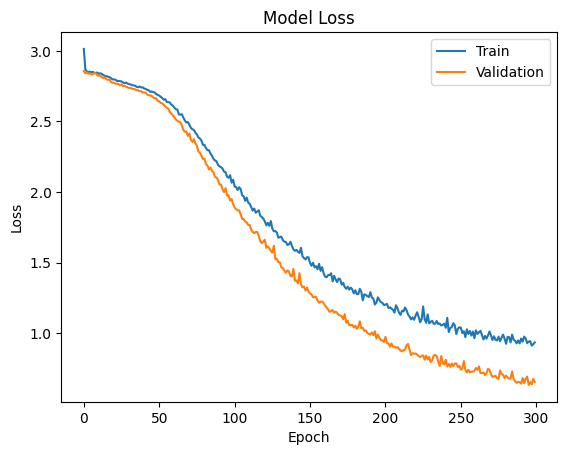

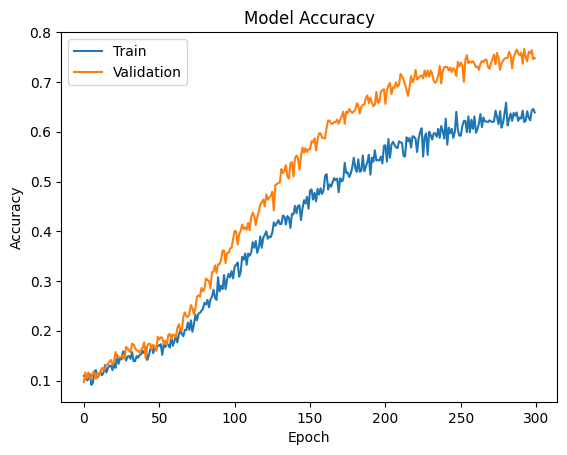

In [ ]:
#@title Model 7
seq_length = 3
input_size = 128
dropout_rate = 0.1
batch_size = 10
epochs = 300

model7 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history7 = model7.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history7)
plot_acc_graph(history7)

filename = "history7.pickle"
var_to_save = history7      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 3, 128)            66560     
                                                                 
 dropout_10 (Dropout)        (None, 3, 128)            0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [=============================

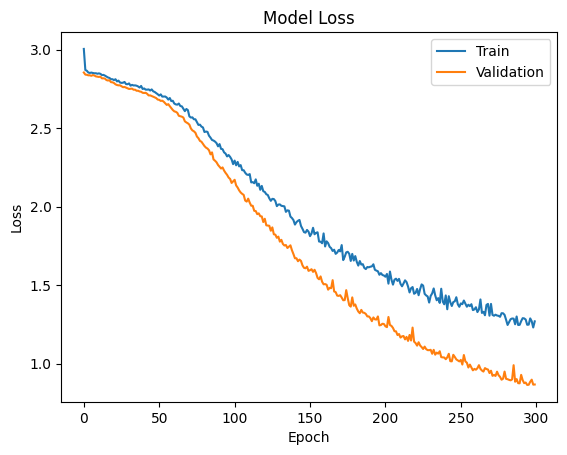

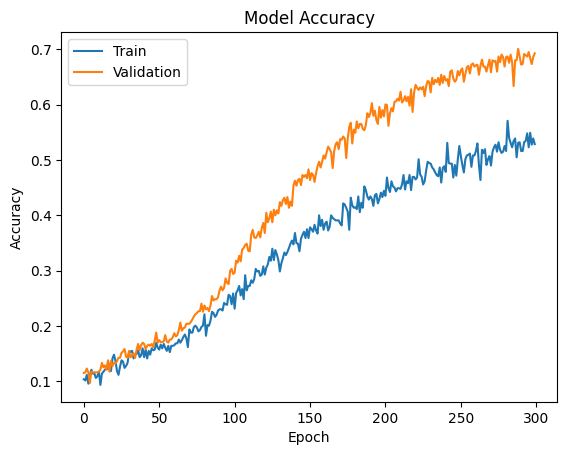

In [ ]:
#@title Model 8
seq_length = 3
input_size = 128
dropout_rate = 0.2
batch_size = 10
epochs = 300

model8 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history8 = model8.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history8)
plot_acc_graph(history8)

filename = "history8.pickle"
var_to_save = history8      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3, 128)            66560     
                                                                 
 dropout_12 (Dropout)        (None, 3, 128)            0         
                                                                 
 lstm_13 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [============================

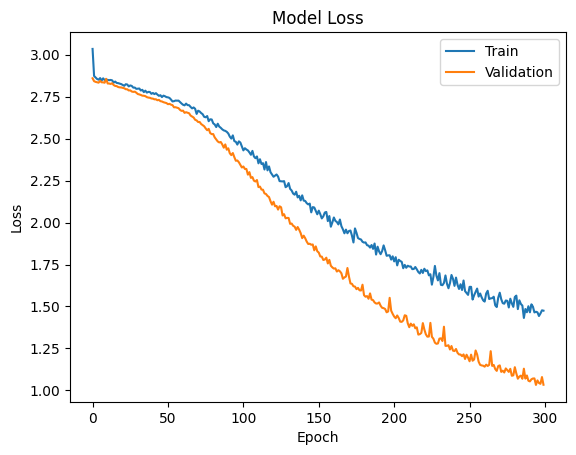

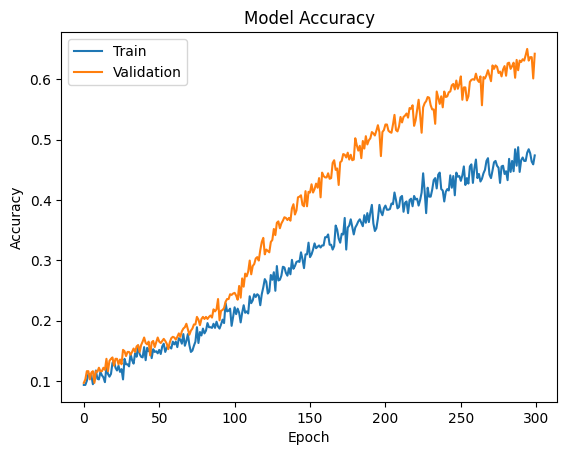

In [ ]:
#@title Model 9
seq_length = 3
input_size = 128
dropout_rate = 0.3
batch_size = 10
epochs = 300

model9 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history9 = model9.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history9)
plot_acc_graph(history9)

filename = "history9.pickle"
var_to_save = history9      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 3, 256)            264192    
                                                                 
 dropout_14 (Dropout)        (None, 3, 256)            0         
                                                                 
 lstm_15 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [============================

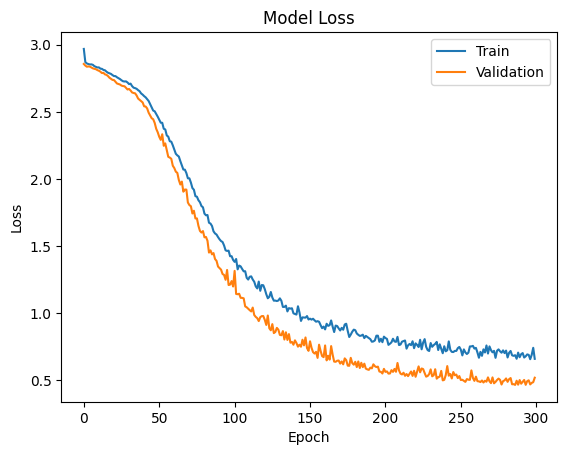

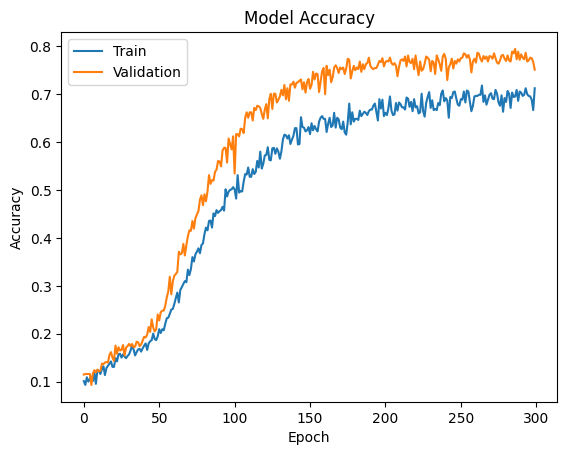

In [ ]:
#@title Model 10
seq_length = 3
input_size = 256
dropout_rate = 0.1
batch_size = 10
epochs = 300

model10 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history10 = model10.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history10)
plot_acc_graph(history10)

filename = "history10.pickle"
var_to_save = history10      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 256)            264192    
                                                                 
 dropout_16 (Dropout)        (None, 3, 256)            0         
                                                                 
 lstm_17 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [============================

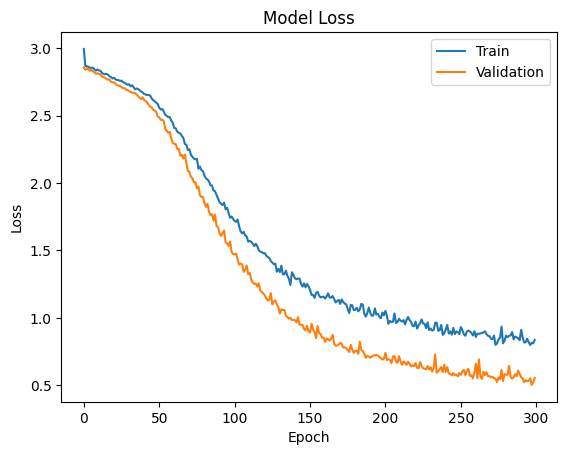

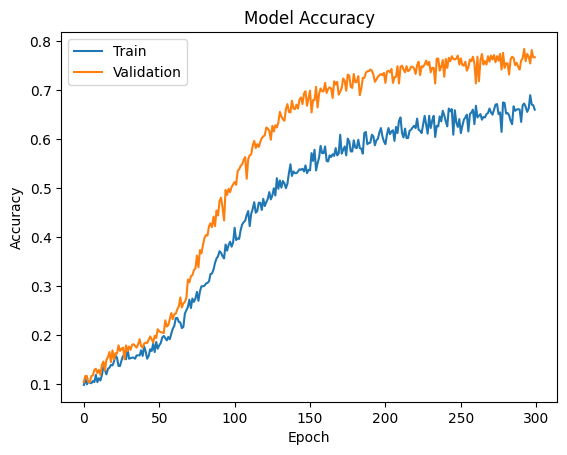

In [ ]:
#@title Model 11
seq_length = 3
input_size = 256
dropout_rate = 0.2
batch_size = 10
epochs = 300

model11 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history11 = model11.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history11)
plot_acc_graph(history11)

filename = "history11.pickle"
var_to_save = history11      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 3, 256)            264192    
                                                                 
 dropout_18 (Dropout)        (None, 3, 256)            0         
                                                                 
 lstm_19 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
88/88 [============================

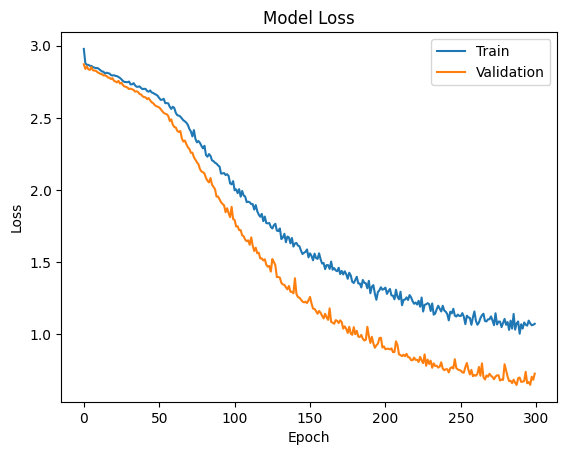

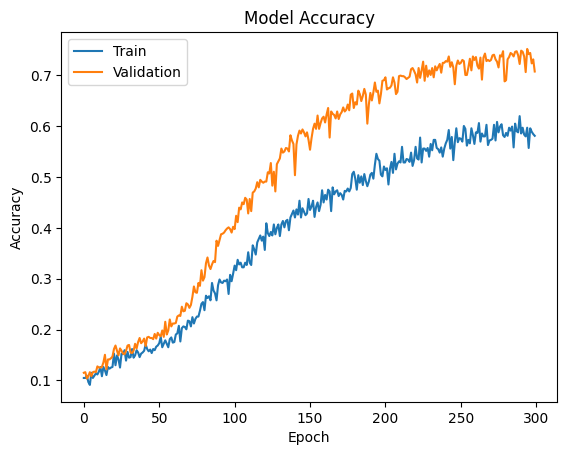

In [ ]:
#@title Model 12
seq_length = 3
input_size = 256
dropout_rate = 0.3
batch_size = 10
epochs = 300

model12 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate)
history12 = model12.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(history12)
plot_acc_graph(history12)

filename = "history12.pickle"
var_to_save = history12      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load trained models


In [ ]:
# Unzip models first
!unzip Models_Task_2.zip

Archive:  Models_Task_2.zip
   creating: Models_Task_2/
  inflating: Models_Task_2/history1.pickle  
  inflating: Models_Task_2/history10.pickle  
  inflating: Models_Task_2/history11.pickle  
  inflating: Models_Task_2/history12.pickle  
  inflating: Models_Task_2/history2.pickle  
  inflating: Models_Task_2/history3.pickle  
  inflating: Models_Task_2/history4.pickle  
  inflating: Models_Task_2/history5.pickle  
  inflating: Models_Task_2/history6.pickle  
  inflating: Models_Task_2/history7.pickle  
  inflating: Models_Task_2/history8.pickle  
  inflating: Models_Task_2/history9.pickle  


In [ ]:
#@title Load in Pickle Files for Each Model

trained_models_list = [] #put all models in the list
for i in range(1,13):
  filename = f"Models_Task_2/history{i}.pickle"
  with open(filename, 'rb') as handle:
    history = pickle.load(handle)
    trained_models_list.append(history)
models_task2 = {i+1:history for i, history in enumerate(trained_models_list)}


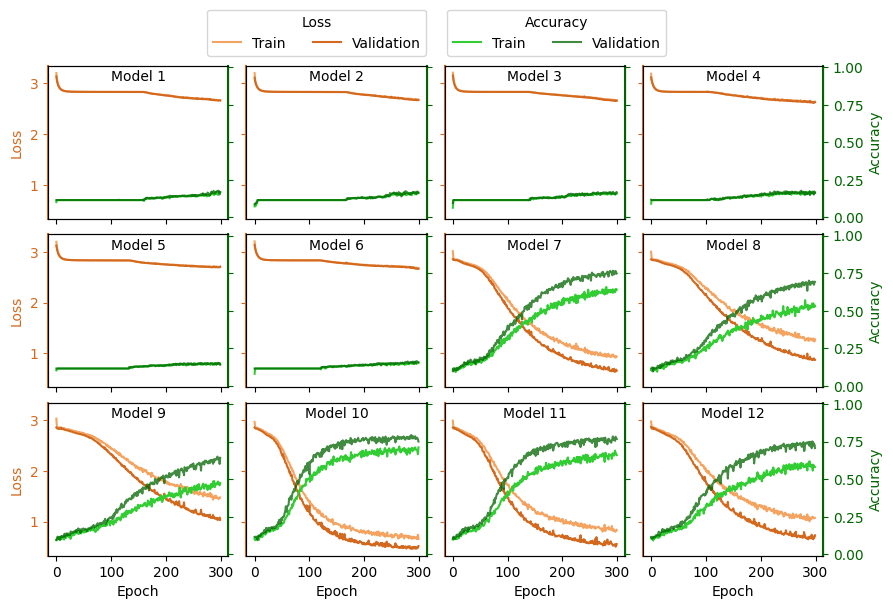

In [ ]:
#@title Loss and Accuracy Curves

# axs = axs.flatten()
fig, axs = plt.subplots(3,4, figsize = (10,7), sharex = True, sharey = True)
axs = axs.flatten()
for id, history in models_task2.items():

  ax1  = axs[id-1]
  ax2  = ax1.twinx()

  
  ax1.annotate(f"Model {id}", xy = (0.5, 0.9), xycoords ="axes fraction", ha = "center" )

  ax1.plot(history.history["loss"], 'sandybrown', label = "Train")
  ax1.plot(history.history["val_loss"], 'chocolate', label = "Validation")
  ax2.plot(history.history["accuracy"], 'limegreen', label = "Train")
  ax2.plot(history.history["val_accuracy"], 'darkgreen', label = "Validation", alpha = 0.75)
  

  if (id - 1) % 4 == 0:
    ax1.set_ylabel("Loss", color = "chocolate")
  if id % 4 == 0:
    ax2.set_ylabel("Accuracy", color = "darkgreen")
  if id % 4 !=0: 
    ax2.set_yticklabels([])

  if id > 8:
    ax1.set_xlabel("Epoch")
  # ax1.tick_params()
  ax1.tick_params(axis = "y" ,color='chocolate', labelcolor='chocolate' )
  ax1.spines.left.set_edgecolor('chocolate')
  ax1.spines.left.set_linewidth(1.5)
  # ax1.spines.bottom.set_linewidth(2)
  # ax1.spines.top.set_linewidth(2)

  ax2.tick_params(axis = "y", color='darkgreen', labelcolor='darkgreen' )
  ax2.spines.right.set_edgecolor('darkgreen')
  ax2.spines.right.set_linewidth(1.5)

  ax2.set_ylim(-0.01, 1.01)
  

plt.subplots_adjust(wspace = 0.1, hspace = 0.1, top = 0.9, bottom = 0.2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() 
fig.legend(lines1, labels1, ncol = 2, bbox_to_anchor = (0.51, .99), title = "Loss")
fig.legend(lines2, labels2, ncol = 2, bbox_to_anchor = (0.75, 0.99), title = "Accuracy")


#Task 3:
For the top-3 performing architectures, raise and lower the sequence length to the lowest it can be (2) and the highest it can be. This will results in a total of 6 new models fittings which should be summarized in a table. How does this change/affect the accuracy/loss?
#####Lowest = 2
#####Highest = 4

In [ ]:
#@title Re-arrange Data Seq_Length = 2
seq_length = 2
x_train = []
y_train = []

for word in csv_file:
  #word = pad_spaces(word) #add spaces on the end of the word
  for i in range(0, len(word) - seq_length, 1):
    seq_in = word[i:i + seq_length]
    seq_out = word[i + seq_length]
    x_train.append([char_to_int(char) for char in seq_in])
    y_train.append(char_to_int(seq_out))

print(x_train[0:5])
print(y_train[0:5])
# reshape X so the model can input it properly
x_train = np.reshape(x_train, (len(x_train), seq_length, 1))
# normalize
x_train = x_train / float(size_of_dict)
# one hot encode the output variable
y_train = np_utils.to_categorical(y_train)

[[65182, 0], [0, 1], [1, 8], [8, 6], [6, 0]]
[1, 8, 6, 0, 8]


## Train Models
Skip the training subsection by uploading the models in pickle format.  [Click here to be directed to `Load Trained models` ](#scrollTo=y35sgYxTPnID)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 2, 128)            66560     
                                                                 
 dropout_20 (Dropout)        (None, 2, 128)            0         
                                                                 
 lstm_21 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_21 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
108/108 [==========================

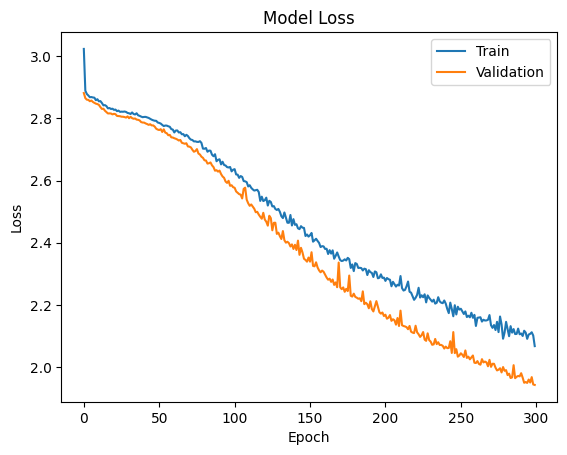

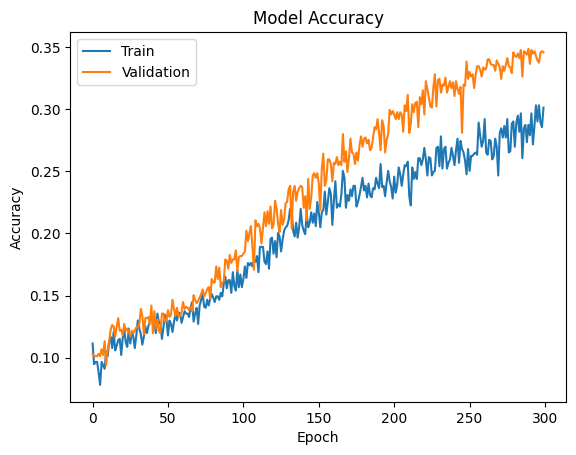

In [ ]:
#@title Model 1
seq_length = 2
input_size = 128
dropout_rate = 0.1
batch_size = 10
epochs = 300

task3_model1 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) 
task3_history1 = task3_model1.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history1)
plot_acc_graph(task3_history1)

filename = "task3_history1.pickle"
var_to_save = task3_history1      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 2, 256)            264192    
                                                                 
 dropout_22 (Dropout)        (None, 2, 256)            0         
                                                                 
 lstm_23 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_23 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
108/108 [==========================

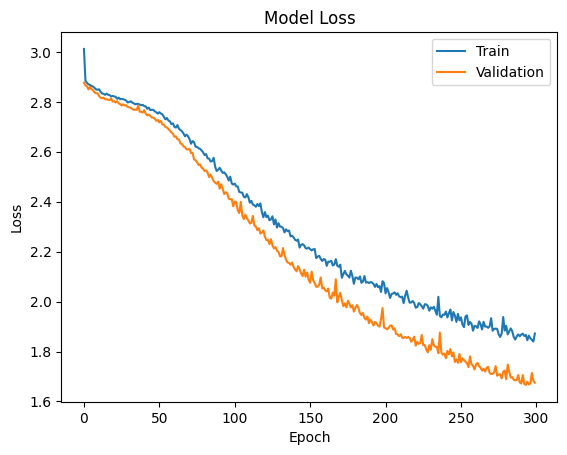

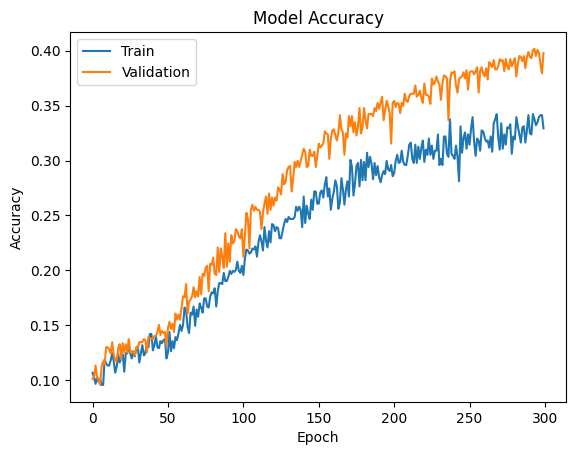

In [ ]:
#@title Model 2
seq_length = 2
input_size = 256
dropout_rate = 0.1
batch_size = 10
epochs = 300

task3_model2 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task3_history2 = task3_model2.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history2)
plot_acc_graph(task3_history2)

filename = "task3_history2.pickle"
var_to_save = task3_history2      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 2, 256)            264192    
                                                                 
 dropout_24 (Dropout)        (None, 2, 256)            0         
                                                                 
 lstm_25 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_25 (Dropout)        (None, 256)               0         
                                                                 
 dense_24 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
108/108 [==========================

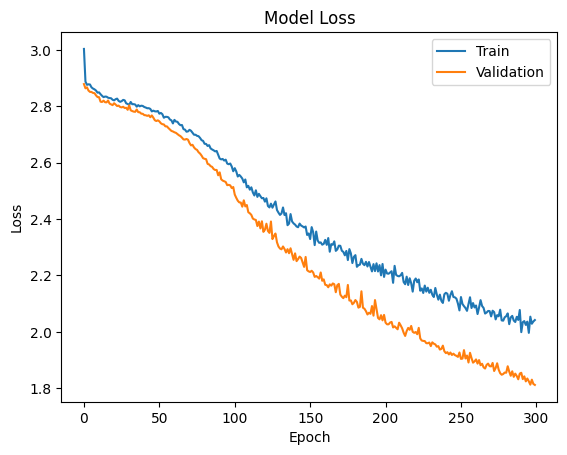

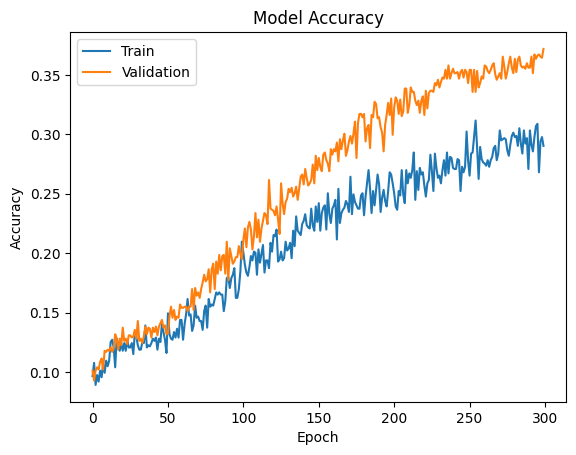

In [ ]:
#@title Model 3
seq_length = 2
input_size = 256
dropout_rate = 0.2
batch_size = 10
epochs = 300

task3_model3 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task3_history3 = task3_model3.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history3)
plot_acc_graph(task3_history3)

filename = "task3_history3.pickle"
var_to_save = task3_history3      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
#@title Re-arrange Data Seq_Length = 4
seq_length = 4
x_train = []
y_train = []

for word in csv_file:
  #word = pad_spaces(word) #add spaces on the end of the word
  for i in range(0, len(word) - seq_length, 1):
    seq_in = word[i:i + seq_length]
    seq_out = word[i + seq_length]
    x_train.append([char_to_int(char) for char in seq_in])
    y_train.append(char_to_int(seq_out))

print(x_train[0:5])
print(y_train[0:5])
# reshape X so the model can input it properly
x_train = np.reshape(x_train, (len(x_train), seq_length, 1))
# normalize
x_train = x_train / float(size_of_dict)
# one hot encode the output variable
y_train = np_utils.to_categorical(y_train)

[[65182, 0, 1, 8], [0, 1, 8, 6], [1, 8, 6, 0], [8, 6, 0, 8], [0, 2, 14, 20]]
[6, 0, 8, 11, 18]


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 4, 128)            66560     
                                                                 
 dropout_26 (Dropout)        (None, 4, 128)            0         
                                                                 
 lstm_27 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_27 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
68/68 [============================

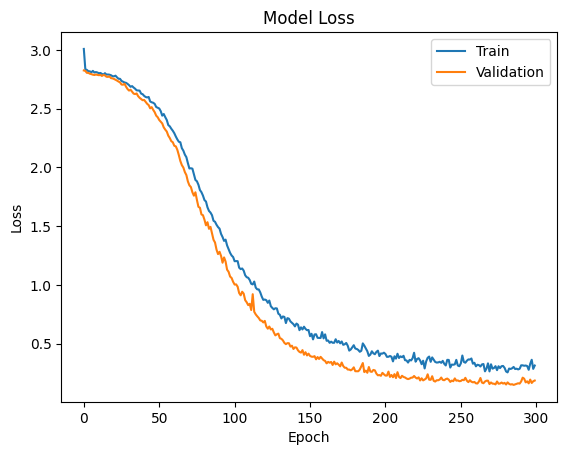

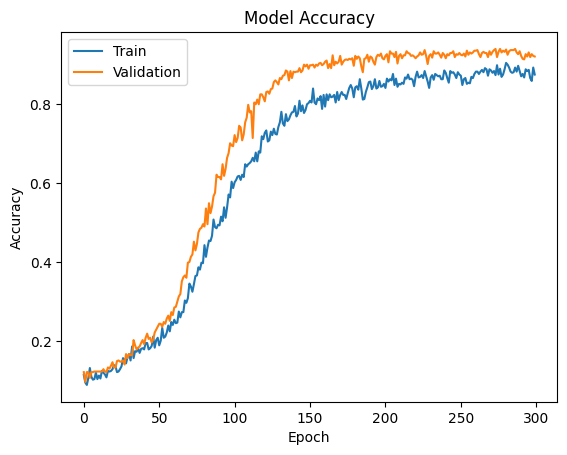

In [ ]:
#@title Model 4
seq_length = 4
input_size = 128
dropout_rate = 0.1
batch_size = 10
epochs = 300

task3_model4 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task3_history4 = task3_model4.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history4)
plot_acc_graph(task3_history4)

filename = "task3_history4.pickle"
var_to_save = task3_history4      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_28 (LSTM)              (None, 4, 256)            264192    
                                                                 
 dropout_28 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_29 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_29 (Dropout)        (None, 256)               0         
                                                                 
 dense_26 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
68/68 [============================

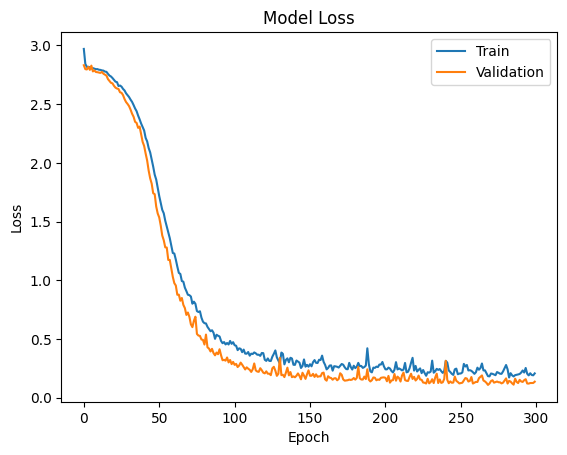

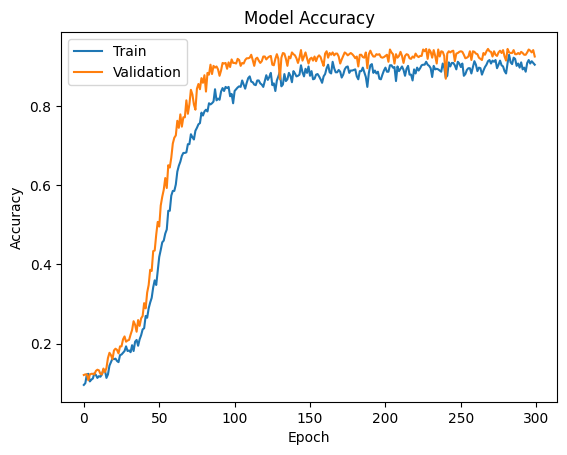

In [ ]:
#@title Model 5
seq_length = 4
input_size = 256
dropout_rate = 0.1
batch_size = 10
epochs = 300

task3_model5 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task3_history5 = task3_model5.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history5)
plot_acc_graph(task3_history5)

filename = "task3_history5.pickle"
var_to_save = task3_history5      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 4, 256)            264192    
                                                                 
 dropout_30 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_31 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_31 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
68/68 [============================

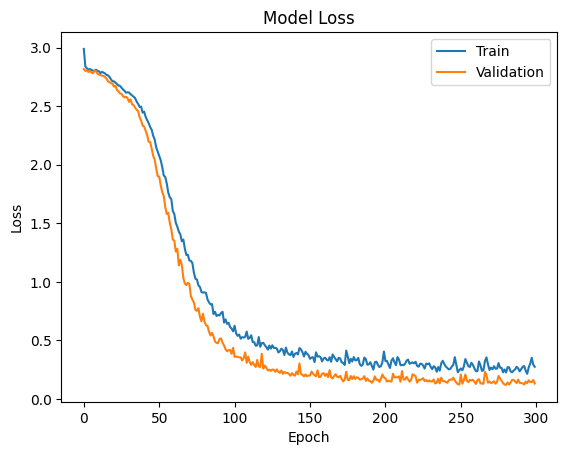

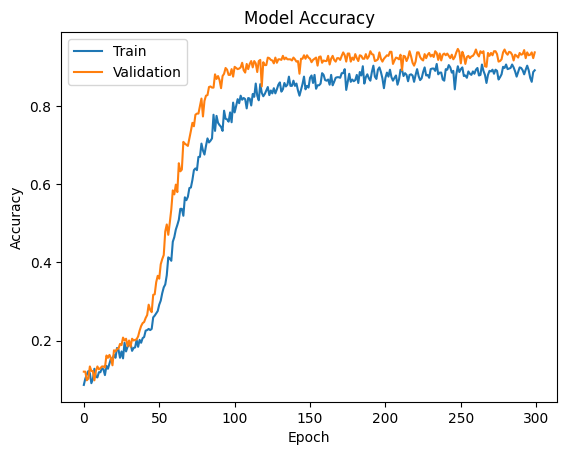

In [ ]:
#@title Model 6
seq_length = 4
input_size = 256
dropout_rate = 0.2
batch_size = 10
epochs = 300

task3_model6 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task3_history6 = task3_model6.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task3_history6)
plot_acc_graph(task3_history6)

filename = "task3_history6.pickle"
var_to_save = task3_history6      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load Trained models

In [ ]:
!unzip Models_Task_3.zip

Archive:  Models_Task_3.zip
   creating: Models_Task_3/
  inflating: Models_Task_3/task3_history1.pickle  
  inflating: Models_Task_3/task3_history2.pickle  
  inflating: Models_Task_3/task3_history3.pickle  
  inflating: Models_Task_3/task3_history4.pickle  
  inflating: Models_Task_3/task3_history5.pickle  
  inflating: Models_Task_3/task3_history6.pickle  


In [ ]:
#@title Load in Pickle Files for Each Model

trained_models_list = [] #put all models in the list
for i in range(1,7):
  filename = f"Models_Task_3/task3_history{i}.pickle"
  with open(filename, 'rb') as handle:
    history = pickle.load(handle)
    trained_models_list.append(history)
models_task3 = {i+1:history for i, history in enumerate(trained_models_list)}

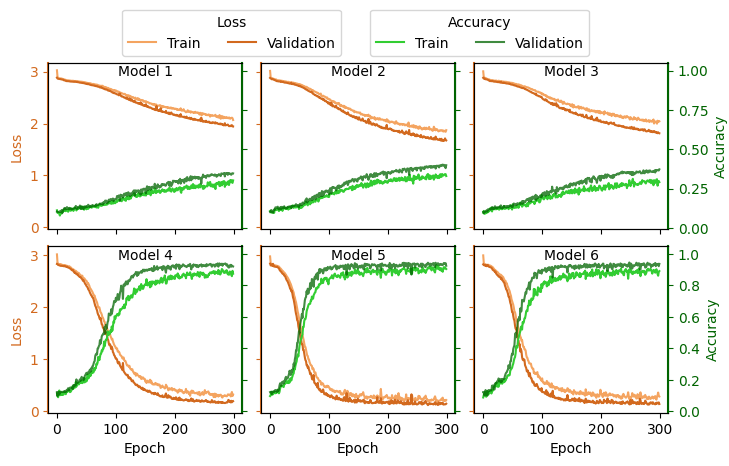

In [ ]:
#@title Loss and Accuracy Curves

# axs = axs.flatten()
fig, axs = plt.subplots(2,3, figsize = (8,5), sharex = True, sharey = True)
axs = axs.flatten()
for id, history in models_task3.items():

  ax1  = axs[id-1]
  ax2  = ax1.twinx()

  
  ax1.annotate(f"Model {id}", xy = (0.5, 0.92), xycoords ="axes fraction", ha = "center" )

  ax1.plot(history.history["loss"], 'sandybrown', label = "Train")
  ax1.plot(history.history["val_loss"], 'chocolate', label = "Validation")
  ax2.plot(history.history["accuracy"], 'limegreen', label = "Train")
  ax2.plot(history.history["val_accuracy"], 'darkgreen', label = "Validation", alpha = 0.75)
  

  if (id - 1) % 3 == 0:
    ax1.set_ylabel("Loss", color = "chocolate")
  if id % 3 == 0:
    ax2.set_ylabel("Accuracy", color = "darkgreen")
  if id % 3 !=0: 
    ax2.set_yticklabels([])

  if id > 3:
    ax1.set_xlabel("Epoch")
  # ax1.tick_params()
  ax1.tick_params(axis = "y" ,color='chocolate', labelcolor='chocolate' )
  ax1.spines.left.set_edgecolor('chocolate')
  ax1.spines.left.set_linewidth(1.5)
  # ax1.spines.bottom.set_linewidth(2)
  # ax1.spines.top.set_linewidth(2)

  ax2.tick_params(axis = "y", color='darkgreen', labelcolor='darkgreen' )
  ax2.spines.right.set_edgecolor('darkgreen')
  ax2.spines.right.set_linewidth(1.5)

  ax2.set_ylim(-0.01, 1.05)
  

plt.subplots_adjust(wspace = 0.1, hspace = 0.1, top = 0.9, bottom = 0.2)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() 
fig.legend(lines1, labels1, ncol = 2, bbox_to_anchor = (0.5, 1.02), title = "Loss")
fig.legend(lines2, labels2, ncol = 2, bbox_to_anchor = (0.81, 1.02), title = "Accuracy")

#Task 4:
Including the results from Task 2 & 3, select the top-3 performing architectures/sequence lengths. Increase the number of epochs while keeping the batch size constant. At what epoch do the loss/accuracy values appera to plateau? Include these graphs in your report. You may need to run the fitting operation to a very high number of epochs, start with 600.

In [ ]:
#@title Re-arrange Data Seq_Length = 4
seq_length = 4
x_train = []
y_train = []

for word in csv_file:
  #word = pad_spaces(word) #add spaces on the end of the word
  for i in range(0, len(word) - seq_length, 1):
    seq_in = word[i:i + seq_length]
    seq_out = word[i + seq_length]
    x_train.append([char_to_int(char) for char in seq_in])
    y_train.append(char_to_int(seq_out))

print(x_train[0:5])
print(y_train[0:5])
# reshape X so the model can input it properly
x_train = np.reshape(x_train, (len(x_train), seq_length, 1))
# normalize
x_train = x_train / float(size_of_dict)
# one hot encode the output variable
y_train = np_utils.to_categorical(y_train)

[[65182, 0, 1, 8], [0, 1, 8, 6], [1, 8, 6, 0], [8, 6, 0, 8], [0, 2, 14, 20]]
[6, 0, 8, 11, 18]


## Train models

Skip the training subsection by uploading the models in pickle format.  [Click here to be directed to `Load Trained models` ](#scrollTo=uqnWgo7ukwoi)


Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_32 (LSTM)              (None, 4, 128)            66560     
                                                                 
 dropout_32 (Dropout)        (None, 4, 128)            0         
                                                                 
 lstm_33 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_33 (Dropout)        (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 26)                3354      
                                                                 
Total params: 201,498
Trainable params: 201,498
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
68/68 [============================

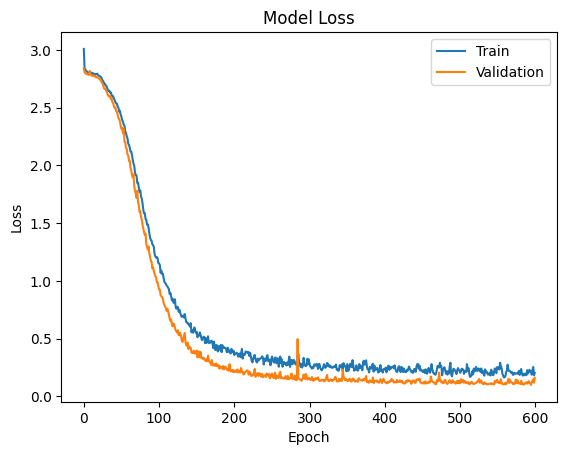

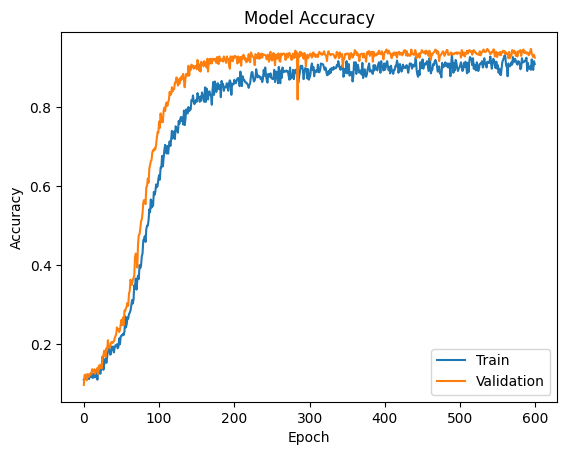

In [ ]:
#@title Model 1:
seq_length = 4
input_size = 128
dropout_rate = 0.1
batch_size = 10
epochs = 600

task4_model1 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task4_history1 = task4_model1.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task4_history1)
plot_acc_graph(task4_history1)

filename = "task4_history1.pickle"
var_to_save = task4_history1      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 4, 256)            264192    
                                                                 
 dropout_38 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_39 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_39 (Dropout)        (None, 256)               0         
                                                                 
 dense_31 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
68/68 [============================

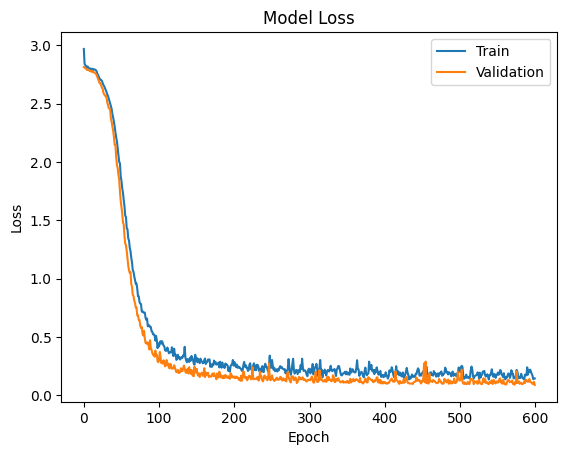

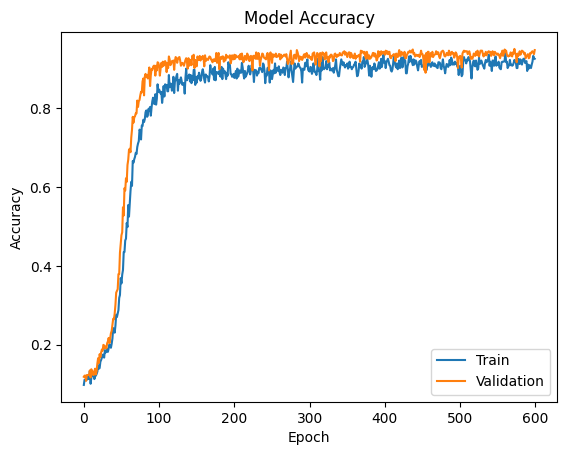

In [ ]:
#@title Model 2:
seq_length = 4
input_size = 256
dropout_rate = 0.1
batch_size = 10
epochs = 600

task4_model2 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task4_history2 = task4_model2.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task4_history2)
plot_acc_graph(task4_history2)

filename = "task4_history2.pickle"
var_to_save = task4_history2      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 4, 256)            264192    
                                                                 
 dropout_40 (Dropout)        (None, 4, 256)            0         
                                                                 
 lstm_41 (LSTM)              (None, 256)               525312    
                                                                 
 dropout_41 (Dropout)        (None, 256)               0         
                                                                 
 dense_32 (Dense)            (None, 26)                6682      
                                                                 
Total params: 796,186
Trainable params: 796,186
Non-trainable params: 0
_________________________________________________________________
Epoch 1/600
68/68 [============================

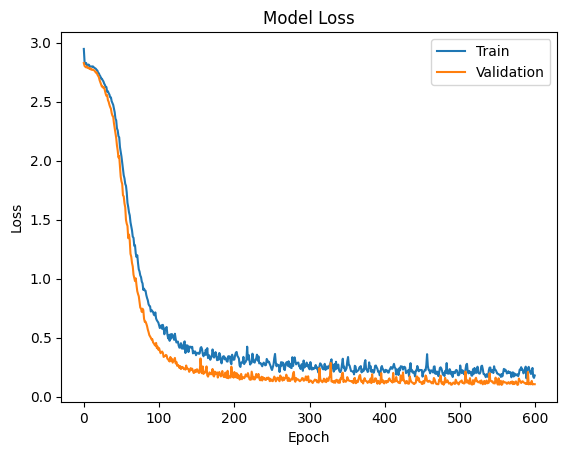

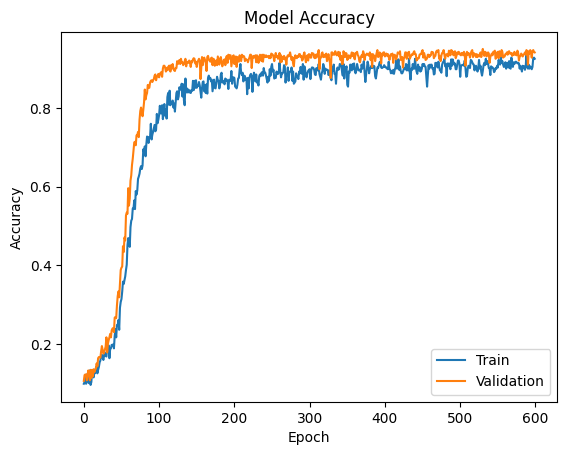

In [ ]:
#@title Model 3:
seq_length = 4
input_size = 256
dropout_rate = 0.2
batch_size = 10
epochs = 600

task4_model3 = get_2LSTMlayers_model(seq_length, input_size, dropout_rate) ######
task4_history3 = task4_model3.fit(x_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    verbose=1,
                    validation_data=(x_train,y_train))

plot_loss_graph(task4_history3)
plot_acc_graph(task4_history3)

filename = "task4_history3.pickle"
var_to_save = task4_history3      
with open(filename, 'wb') as handle:
    pickle.dump(var_to_save, handle, protocol=pickle.HIGHEST_PROTOCOL)

## Load Trained models

In [ ]:
!unzip Models_Task_4.zip

Archive:  Models_Task_4.zip
   creating: Models_Task_4/
  inflating: Models_Task_4/task4_history1.pickle  
  inflating: Models_Task_4/task4_history2.pickle  
  inflating: Models_Task_4/task4_history3.pickle  


In [ ]:
#@title Load in Pickle Files for Each Model

trained_models_list = [] #put all models in the list
for i in range(1,4):
  filename = f"Models_Task_4/task4_history{i}.pickle"
  with open(filename, 'rb') as handle:
    history = pickle.load(handle)
    trained_models_list.append(history)
models_task4 = {i+1:history for i, history in enumerate(trained_models_list)}

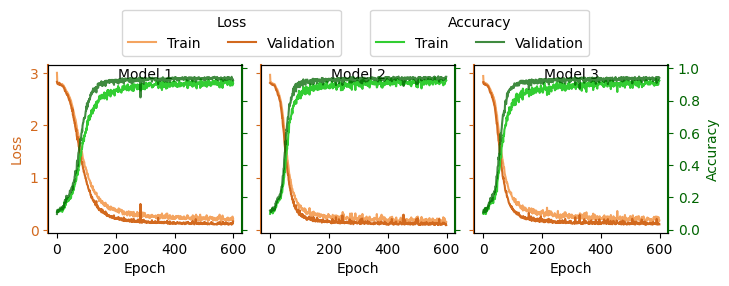

In [ ]:
#@title Loss and Accuracy Curves

# axs = axs.flatten()
fig, axs = plt.subplots(1,3, figsize = (8,2.5), sharex = True, sharey = True)
axs = axs.flatten()
for id, history in models_task4.items():

  ax1  = axs[id-1]
  ax2  = ax1.twinx()

  
  ax1.annotate(f"Model {id}", xy = (0.5, 0.92), xycoords ="axes fraction", ha = "center" )

  ax1.plot(history.history["loss"], 'sandybrown', label = "Train")
  ax1.plot(history.history["val_loss"], 'chocolate', label = "Validation")


  ax2.plot(history.history["accuracy"], 'limegreen', label = "Train")
  ax2.plot(history.history["val_accuracy"], 'darkgreen', label = "Validation", alpha = 0.75)
  

  if (id - 1) % 3 == 0:
    ax1.set_ylabel("Loss", color = "chocolate")
  if id % 3 == 0:
    ax2.set_ylabel("Accuracy", color = "darkgreen")
  if id % 3 !=0: 
    ax2.set_yticklabels([])

  ax1.set_xlabel("Epoch")

  ax1.tick_params(axis = "y" ,color='chocolate', labelcolor='chocolate' )
  ax1.spines.left.set_edgecolor('chocolate')
  ax1.spines.left.set_linewidth(1.5)

  ax2.tick_params(axis = "y", color='darkgreen', labelcolor='darkgreen' )
  ax2.spines.right.set_edgecolor('darkgreen')
  ax2.spines.right.set_linewidth(1.5)

  ax2.set_ylim(-0.02, 1.02 )
  # ax2.set_yscale("log")
  # ax1.set_yscale("log")
  

plt.subplots_adjust(wspace = 0.1, hspace = 0.1, top = 0.77, bottom = 0.1)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() 
fig.legend(lines1, labels1, ncol = 2, bbox_to_anchor = (0.5, 1.02), title = "Loss")
fig.legend(lines2, labels2, ncol = 2, bbox_to_anchor = (0.81, 1.02), title = "Accuracy")

#Task 5:
Are you able to run one of your models and demonstrate how it actually completes a word and generates predicted ending?

Select the model to use for the word completion and the input sequence length `seq_length`

In [ ]:
def predict_new_letter(text_to_proccess, model, size_of_dict = size_of_dict):
    seq_length = len(text_to_proccess)
    text_arr = []
    text_arr.append([char_to_int(char) for char in text_to_proccess])
    text_arr_reshaped = np.reshape(text_arr, (len(text_arr), seq_length, 1))
    text_arr_reshaped = text_arr_reshaped / float(size_of_dict) #normalize
    arr = model.predict(text_arr_reshaped, verbose = 0)
    predicted_letter = index_to_letter(arr)
    return predicted_letter

In [ ]:
model = models_task4[2].model
seq_length = 4

In [ ]:
#@title Word completion demonstration { run: "auto", vertical-output: true}
#@markdown ## After the first manual run, calculations will be peformed automatically
#@markdown ### Type at least four letters:

Input = 'abig' #@param {type:"string"}

text = Input
if len(text) < seq_length:
  print("A longer input sequence is needed")
else:  
  # Continue guessing the next letter for an arbitrary 10 times, feel free to adjust this value
  for i in range(10):
    text_to_proccess = text[-seq_length:]
    predicted_letter = predict_new_letter(text_to_proccess, model)

    if is_predicted_word_match(text + predicted_letter):
      print("Completed word: ", text + predicted_letter)
      break
    else:
      text = text + predicted_letter
  if i == 9:
    print("Sorry, the word could not be completed")




Sorry, the word could not be completed
